<a href="https://colab.research.google.com/github/Betson1/MachineLearning/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%9F%D0%BE%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка датасета

In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

dataset = pd.read_csv('/content/drive/MyDrive/auction_verification.csv')

dataset.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667


In [ ]:
vals = dataset["verification.result"].unique()
vals

array([False,  True])

In [ ]:
cols= ['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity',
       'process.b4.capacity', 'property.price', 'property.product',
       'property.winner', 'verification.time']

cols_for_clusters = ['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity',
       'process.b4.capacity', 'property.price', 'property.product',
       'property.winner','verification.result', 'verification.time']

df= dataset[cols_for_clusters].copy() # делаем копию, чтобы не было сюрпризов с исходным набором данных

In [ ]:
X = df
y = dataset["verification.result"].replace(vals, [0, 1])
yvals = dataset["verification.result"]

<ipython-input-5-e5b618af0415>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = dataset["verification.result"].replace(vals, [0, 1])


# Метод главных компонентов (Principal Component Analysis, PCA)

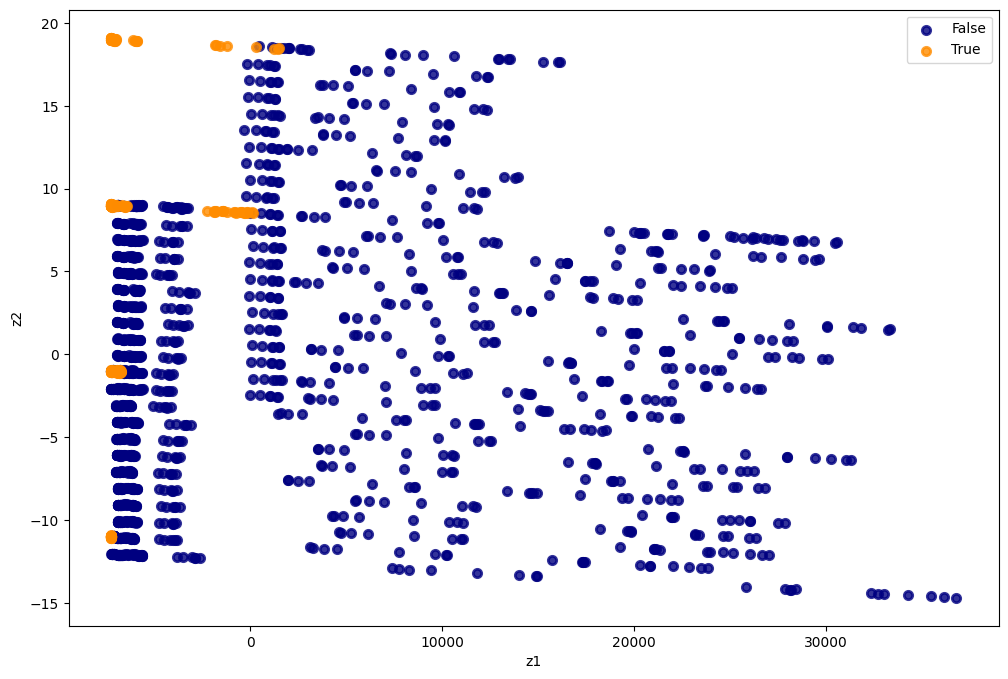

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)

plt.figure(figsize=(12,8))
colors = ["navy", "darkorange"]
lw = 2

for color, i, target_name in zip(colors[:len(y.unique())], y.unique(), cols_for_clusters[:len(y.unique())]):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([9.99999351e-01, 5.99215582e-07])

Первая главная компонента объясняет почти всю дисперсию данных (~99.9999%).

Это значит, что большая часть информации в исходных данных может быть представлена с помощью одной этой компоненты.

# Независисый анализ компонентов (Independent Component Analysis, ICA)

In [ ]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

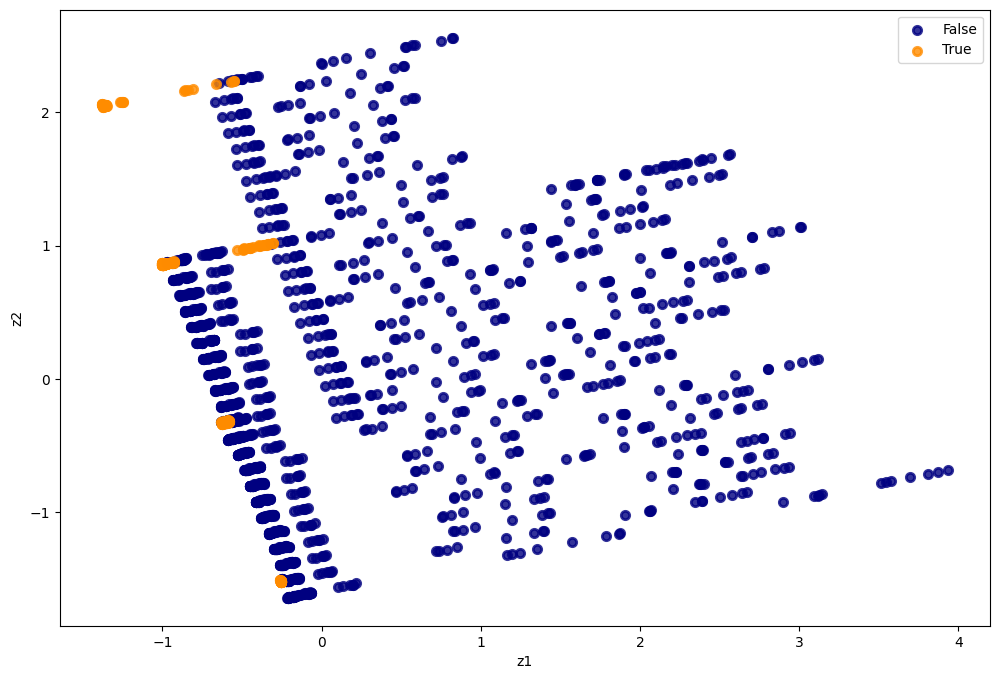

In [ ]:
plt.figure(figsize=(12,8))
colors = ["navy",  "darkorange"]
lw = 2

for color, i in zip(colors[:len(y.unique())], y.unique()):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

# Нелинейные методы уменьшения размерности

## Kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

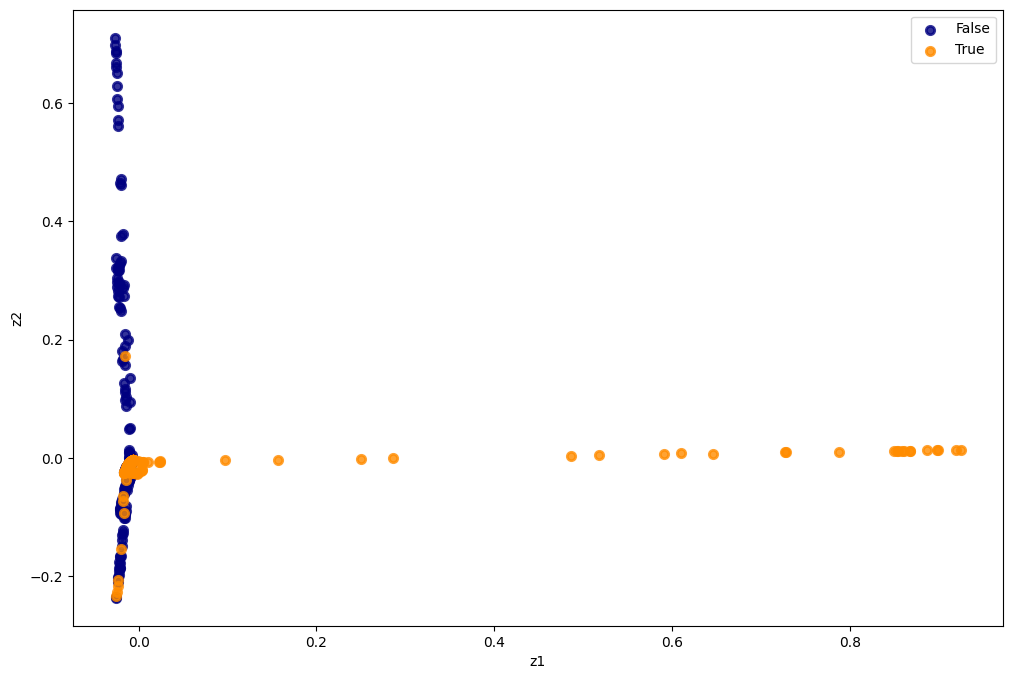

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
colors = ["navy", "darkorange"]
lw = 2

# Assuming 'y' contains cluster labels and you want to plot clusters 0, 1, and 2
for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    # Check if the cluster label 'i' exists in 'y'
    if i in y.unique():
        plt.scatter(
            X_new[y == i, 0],
            X_new[y == i, 1],
            color=color,
            alpha=0.8,
            lw=lw,
            label=vals[i]  # Make sure 'vals' is defined and has enough elements
        )
    else:
        print(f"Cluster label {i} not found in 'y'")

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

## tSNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [ ]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (2043, 9)
New Shape of X:  (2043, 2)
Kullback-Leibler divergence after optimization:  0.2339985966682434
No. of iterations:  999


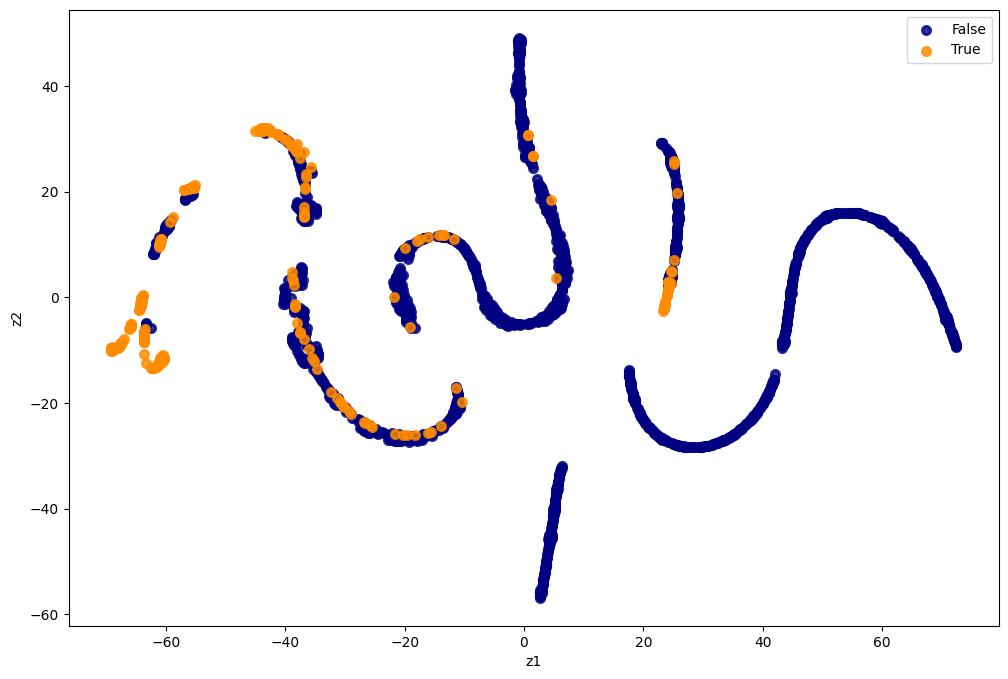

In [ ]:
plt.figure(figsize=(12,8))
colors = ["navy", "darkorange"]
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    if i < len(vals):  # Check if 'i' is a valid index for 'vals'
        plt.scatter(
            X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
        )
    else:
        print(f"Index {i} is out of bounds for 'vals'")  # Print a message if the index is invalid

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

## DBSCAN для кластеризации

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [ ]:
dbscan_cluster1 = DBSCAN(eps = 500, min_samples = 3)
X_new = dbscan_cluster1.fit(X)

In [ ]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 3
Estimated no. of noise points: 4
v_measure = 0.055259435773784484


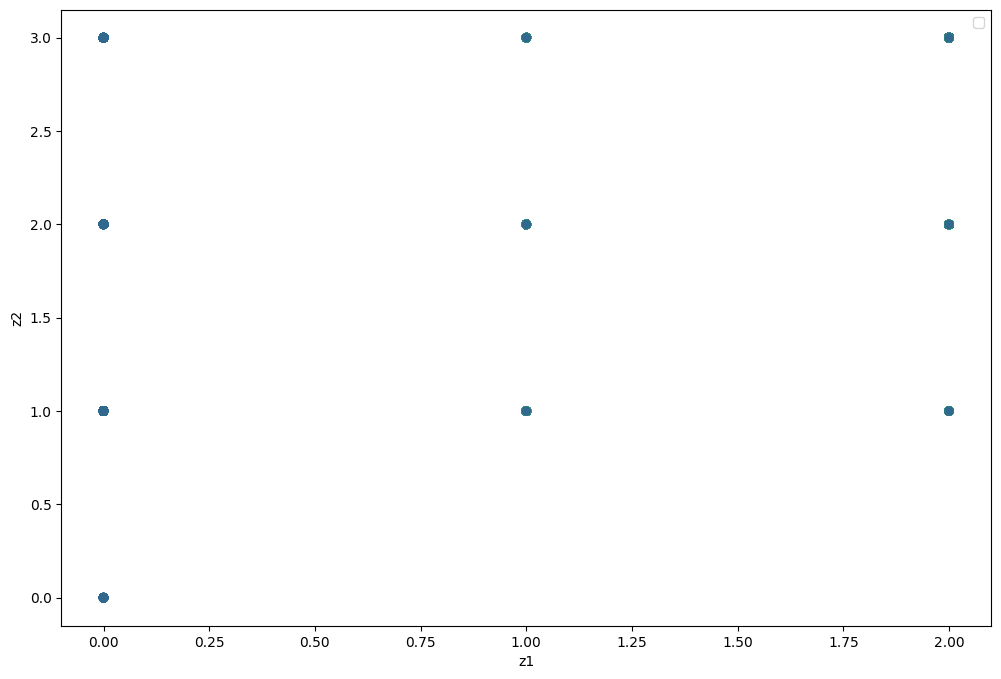

In [ ]:
plt.figure(figsize=(12, 8))
colors = ["navy", "darkorange"]
lw = 2

cols = [0, 1]  #

plt.scatter(X.iloc[:, cols[0]], X.iloc[:, cols[1]], c=dbscan_cluster1.labels_)

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors

min_samples = 3

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [ ]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

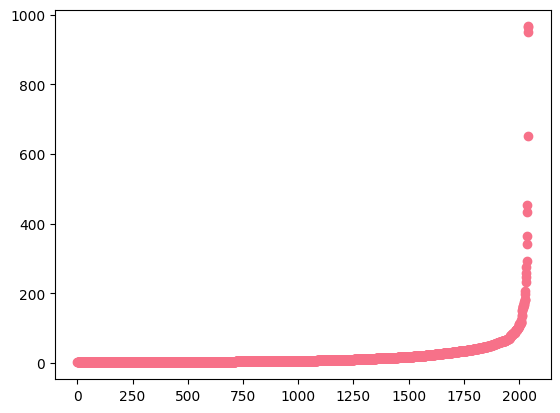

In [ ]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

## DBSCAN для определения выбросов

In [ ]:
dbscan = DBSCAN(eps = 500, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=500, min_samples=3)


In [ ]:
pred = dbscan.fit_predict(X)

In [ ]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 3
Estimated no. of noise points: 4
v_measure = 0.055259435773784484


In [ ]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

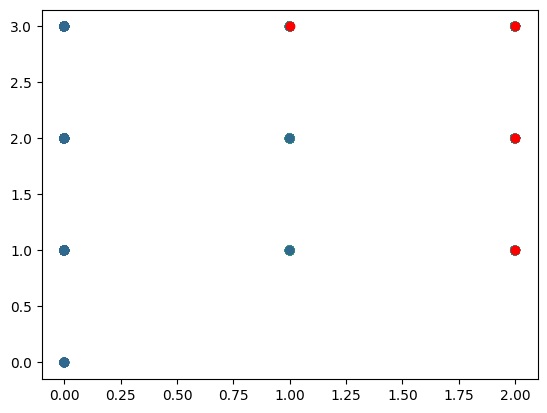

In [ ]:
plt.scatter(X.iloc[:, cols[0]], X.iloc[:, cols[1]], c=dbscan_cluster1.labels_)
plt.scatter(values.iloc[:, cols[0]], values.iloc[:, cols[1]], color='r')
plt.show()

Красным цветом выделяются выбросы